In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf
import os

# Downloading historical daily data of ETH-USD via Yahoo Finance

In [2]:
ETH_USD_data = yf.download('ETH-USD', start='2021-03-01', end='2022-03-01')

[*********************100%***********************]  1 of 1 completed


In [4]:
ETH_USD_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-25,2598.436279,2821.972412,2579.208008,2764.535645,2764.535645,17208902048
2022-02-26,2764.989502,2849.424072,2745.009033,2781.111816,2781.111816,11724648351
2022-02-27,2780.504395,2831.125488,2581.615723,2621.801758,2621.801758,16150857254
2022-02-28,2621.172119,2929.180420,2586.388184,2919.201172,2919.201172,19266124733
2022-03-01,2919.775879,3029.651611,2868.938965,2972.485107,2972.485107,18757425786


In [5]:
ETH_USD_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-01,1417.151123,1567.694580,1416.416138,1564.707642,1564.707642,24032838645
2021-03-02,1564.063477,1597.610107,1461.325439,1492.608765,1492.608765,22523669722
2021-03-03,1491.451172,1650.360596,1481.905762,1575.853149,1575.853149,22674780680
2021-03-04,1574.623779,1622.953857,1511.103394,1541.914307,1541.914307,22906118718
2021-03-05,1541.541748,1547.878174,1450.891357,1533.275024,1533.275024,21067146937


In [6]:
#Statistical discription of the data
ETH_USD_data.describe().round(2)

,Open,High,Low,Close,Adj Close,Volume
count,366.00,366.00,366.00,366.00,366.00,3.660000e+02
mean,3021.72,3124.31,2904.72,3025.14,3025.14,2.375455e+10
std,846.43,860.59,826.44,840.55,840.55,1.099366e+10
min,1417.15,1547.88,1416.42,1492.61,1492.61,9.054964e+09
25%,2322.24,2431.50,2172.35,2326.06,2326.06,1.658344e+10
50%,3002.04,3141.03,2879.44,3001.40,3001.40,2.125133e+10
75%,3740.40,3836.70,3593.97,3737.87,3737.87,2.737119e+10
max,4810.07,4891.70,4718.04,4812.09,4812.09,8.448291e+10


# Movement of ETH-USD

In [7]:
##Log return
log_return = []
for i in range(0,len(ETH_USD_data)-1):
    adjclose_yesterday = ETH_USD_data.iloc[i]['Adj Close']
    adjclose_today = ETH_USD_data.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
log_return[:5]

[-0.047173558296895124,
 0.05427137002269247,
 -0.021772107057521358,
 -0.005618714183079258,
 0.07623886335092327]

In [8]:
dflr = pd.DataFrame(log_return, columns = ['log']) 
lr = dflr.mean() * len(dflr)
lv = dflr.std() * (len(dflr) ** 0.5)
print('The annulized log return is %.8f and its annulized volatility is %.8f' % (lr,lv))

The annulized log return is 0.64169934 and its annulized volatility is 0.99098769


# # Movement (shape) of ETH-USD

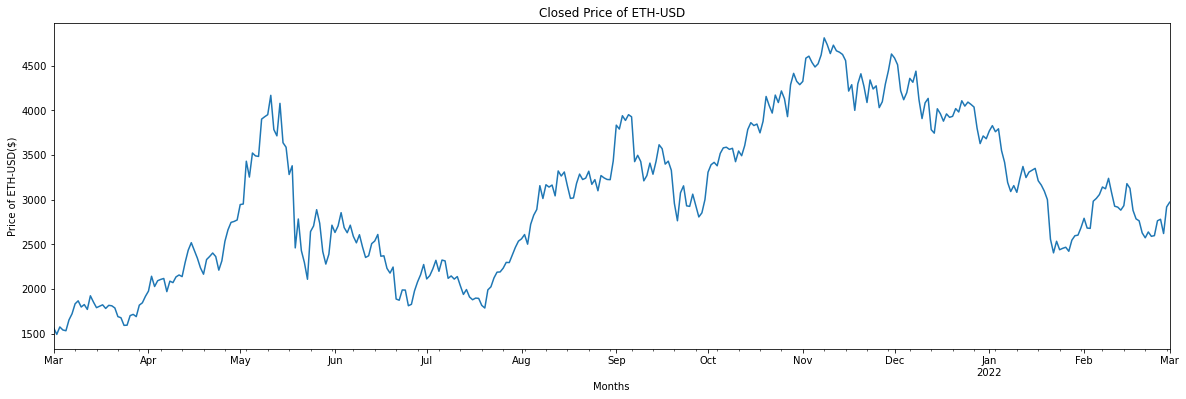

In [10]:
#movement (shape) of the cryptocurrency 
fig = plt.figure()
closed_price =  ETH_USD_data['Close']
closed_price.plot(figsize=(20, 6))
plt.xlabel('Months')
plt.ylabel('Price of ETH-USD($)')
plt.title('Closed Price of ETH-USD');

<Figure size 432x288 with 0 Axes>

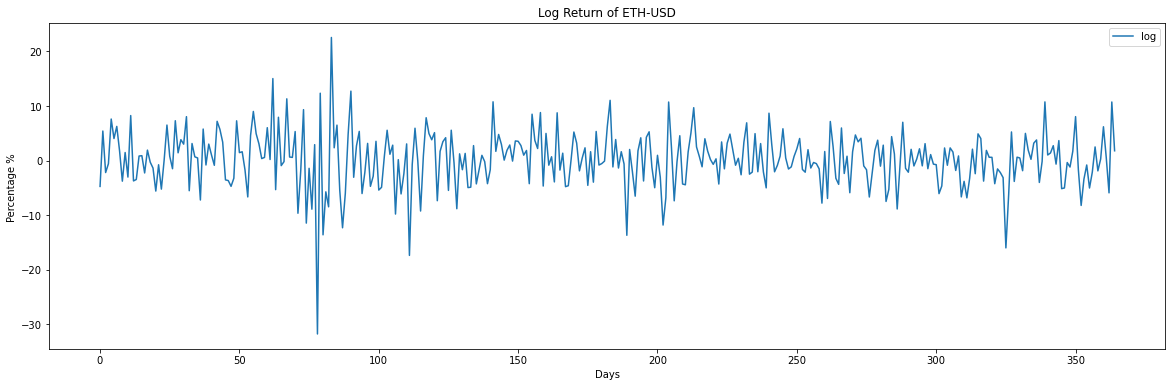

In [11]:
fig = plt.figure()
big_graph = dflr * 100
#plt.plot(dflr * 100)
big_graph.plot(figsize=(20, 6))
plt.xlabel('Days')
plt.ylabel('Percentage % ')
plt.title('Log Return of ETH-USD');

# Annualised volatility %

In [12]:
log_return = np.log(ETH_USD_data['Adj Close'] / ETH_USD_data['Adj Close'].shift(1))
vol_h = np.sqrt(365) * log_return.std()
print('The annualised volatility is', round(vol_h*100,2), '%')

The annualised volatility is 99.1 %


# Methodology 1: CRR Binomial tree (European call option)

In [13]:
#Step 1: Creating the binomial price tree

S0 = 2972.48             # Closed price of ETH_USD on 2022-03-01
K = 2800                 # strike price  
T = 0.019                # maturity - 1/52 (one week) 
r = 1.62                 # risk free rate -> https://www.bloomberg.com/markets/rates-bonds/government-bonds/us [accessed:02-04-2022 00:47]
sig = 0.99               # volatility (Historical log return)
N = 4                    # number of periods or number of time steps  
payoff = "call"          # payoff 

In [14]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor 
print('the value dT is ',dT, ',The value of u is', u, 'and the value of d is', d)

the value dT is  0.00475 ,The value of u is 1.0706126356658745 and the value of d is 0.9340446457350501


In [15]:
#constructing tree for underlying asset price
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1
S

array([[2972.48      , 3182.37464726, 3407.09050878, 3647.67414956,
        3905.24603531],
       [   0.        , 2776.42902855, 2972.48      , 3182.37464726,
        3407.09050878],
       [   0.        ,    0.        , 2593.30866838, 2776.42902855,
        2972.48      ],
       [   0.        ,    0.        ,    0.        , 2422.26607644,
        2593.30866838],
       [   0.        ,    0.        ,    0.        ,    0.        ,
        2262.50465925]])

In [16]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
print('The value of risk neutral up probability is', p.round(2))
print('The value of risk neutral down probability is', q.round(2))

The value of risk neutral up probability is 0.54
The value of risk neutral down probability is 0.46


In [17]:
#Finding option value at each final node
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[   0.        ,    0.        ,    0.        ,    0.        ,
        1105.24603531],
       [   0.        ,    0.        ,    0.        ,    0.        ,
         607.09050878],
       [   0.        ,    0.        ,    0.        ,    0.        ,
         172.48      ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ]])

In [18]:
#Finding option value at earlier nodes
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V


array([[ 323.02188889,  465.99432788,  649.85261039,  869.13746355,
        1105.24603531],
       [   0.        ,  160.93290439,  258.40151714,  403.83796125,
         607.09050878],
       [   0.        ,    0.        ,   49.43753243,   92.34167853,
         172.48      ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ]])

In [19]:
print('The value of European call option ' + payoff, str( V[0,0]))

The value of European call option call 323.02188889149596


# # Methodology 2: Monte Carlo simulation (European call option)

In [47]:
S0 = 2972.48               # Closed price of ETH_USD on 2022-03-01
K = 2800                   # strike price 
T = 0.019                  # maturity - 1/52 (one week) 
r = 1.62                   # risk free rate -> https://www.bloomberg.com/markets/rates-bonds/government-bonds/us [accessed:02-04-2022 00:47]
sigma = 0.99               # volatility (Historical log return)

def mcs_simulation(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [48]:
S = mcs_simulation(10000)

In [49]:
S = np.transpose(S)
S

array([[2972.48      , 2978.33436201, 2979.78481942, ..., 2930.1849164 ,
        2929.10022924, 2932.24225774],
       [2972.48      , 2971.15249054, 2960.77875743, ..., 2469.46760742,
        2468.80560558, 2474.15336292],
       [2972.48      , 2974.51788315, 2977.69690548, ..., 2997.33702886,
        2995.2605874 , 2992.10854425],
       ...,
       [2972.48      , 2982.84263854, 2989.55089921, ..., 3060.35809966,
        3062.50553545, 3067.61467173],
       [2972.48      , 2982.86055045, 2980.77293668, ..., 2737.91763142,
        2740.87512656, 2744.51074998],
       [2972.48      , 2964.1900525 , 2954.98833196, ..., 3117.66289938,
        3114.51353612, 3117.26303678]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

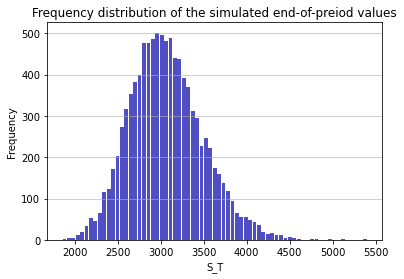

In [50]:
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [51]:
c = np.mean(np.maximum(S[:,-1] - K,0)) * np.exp(-r * T)
print('European call for Monte carlo simulation', str(c))

European call for Monte carlo simulation 316.7595298911836


# # Methodology 3: Black–Scholes model (European call option)

In [52]:
def euro_option_bsm(S, K, T, r, q, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [55]:
BSM_value = euro_option_bsm(2972.48, 2800, 0.019, 1.62, 0, 0.99, 'call')
print('The value of European call option using BSM is', BSM_value)

#S0 = 2972.48        # Closed price of ETH-USD on 2022-03-01
#K = 2800            # strike price
#T = 1/52            # maturity - 1/52 (one week) 
#r = 1.62            # risk free rate -> https://www.bloomberg.com/markets/rates-bonds/government-bonds/us [accessed:02-04-2022 00:47]
#sigma = 0.99        # diffusion coefficient or volatility (Historical log return)

The value of European call option using BSM is 316.16025382492694


# Greeks for the risk management purpose

# Greeks: Delta

In [56]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    return delta

In [57]:
d = delta(2972.48, 2800, 0.019, 1.62, 0, 0.99, 'call')
print('The value of Delta is', d.round(4),'.','If the underlying asset price increase 1 dollar, then the value of the call option will increase $',d.round(4),'.')
#Delta, ∆, measures the rate of change of the theoretical option value with respect to changes in the underlying asset's price. 
#Delta is the first derivative of the value V of the option with respect to the underlying instrument's price S.

The value of Delta is 0.7679 . If the underlying asset price increase 1 dollar, then the value of the call option will increase $ 0.7679 .


In [58]:
S = np.linspace(1500, 4000, 51)
T = np.linspace(0, 3, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 2800, T[i], 1.62, 0, 0.99, 'call')

C:\Users\Samson\AppData\Local\Temp/ipykernel_18784/3011456214.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
C:\Users\Samson\AppData\Local\Temp/ipykernel_18784/3011456214.py:3: RuntimeWarning: invalid value encountered in double_scalars
  d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))


C:\Users\Samson\AppData\Local\Temp/ipykernel_18784/2037322540.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
C:\Users\Samson\AppData\Local\Temp/ipykernel_18784/2037322540.py:4: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)


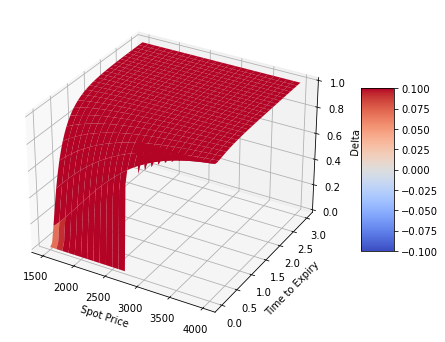

In [59]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Spot Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Greeks: Gamma

In [60]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    return gamma

In [63]:
ga = gamma(2972.48, 2800, 0.019, 1.62, 0, 0.99, 'call')
print('The value of Gamma is', ga.round(4))

"""the option of delta 0.7679 and a gamma as 0.0008, the premium expected to change $0.7679, 
with the first dollar move in the underlying then, to figure out the impact of the next dollar move, 
we can simply add delta and gamma together to find the new delta value which is $0.7687"""

The value of Gamma is 0.0008


'the option of delta 0.7679 and a gamma as 0.0008, the premium expected to change $0.7679, \nwith the first dollar move in the underlying then, to figure out the impact of the next dollar move, \nwe can simply add delta and gamma together to find the new delta value which is $0.7687'

In [64]:
S = np.linspace(1500, 400, 51)
T = np.linspace(0, 2, 51)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 2800, T[i], 1.62, 0, 0.99, 'call')

C:\Users\Samson\AppData\Local\Temp/ipykernel_18784/2720584673.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
C:\Users\Samson\AppData\Local\Temp/ipykernel_18784/2720584673.py:4: RuntimeWarning: invalid value encountered in double_scalars
  gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))


Text(0.5, 0, 'Gamma')

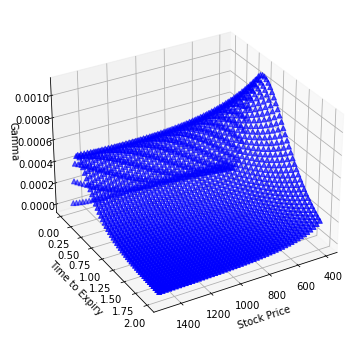

In [65]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 60)
S, T = np.meshgrid(S, T)
ax.scatter(S, T, Gamma, zdir='z', s=25, c='b', marker='^')
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')

# Greeks: Theta

In [66]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    return theta

In [67]:
th = theta(2972.48, 2972, 0.019, 1.62, 0, 0.99, 'call')
print('The value of Theta for call option is', th.round(2))

The value of Theta for call option is 6705.57


In [68]:
S = np.linspace(1500, 4000, 51)
T = np.linspace(0, 3, 50)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 2800, T[i], 1.62, 0, 0.99, 'call')

C:\Users\Samson\AppData\Local\Temp/ipykernel_18784/209644280.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
C:\Users\Samson\AppData\Local\Temp/ipykernel_18784/209644280.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
C:\Users\Samson\AppData\Local\Temp/ipykernel_18784/209644280.py:6: RuntimeWarning: invalid value encountered in double_scalars
  theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
C:\Users\Samson\AppData\Local\Temp/ipykernel_18784/209644280.py:3: RuntimeWarning: invalid value encountered in double_scalars
  d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
C:\Users\Samson\AppData\Local\Temp/ipykernel_18784/209644280.py:4: RuntimeWa

C:\Users\Samson\AppData\Local\Temp/ipykernel_18784/383283098.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
C:\Users\Samson\AppData\Local\Temp/ipykernel_18784/383283098.py:4: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)


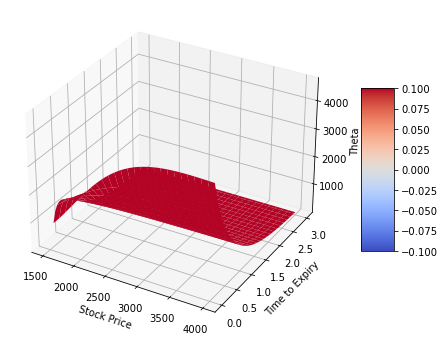

In [69]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Greeks: Rho

In [80]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [81]:
rh = rho(2972.48, 2800, 0.019, 1.62, 0, 0.99, 'call')
print('The value of rho for call option is', rh.round(4))


The value of rho for call option is 37.3598


In [82]:
S = np.linspace(1500, 4000, 100)
r = np.linspace(0, 2, 11)
Rho = np.zeros((len(r),len(S)))
for j in range(len(S)):
    for i in range(len(r)):
        Rho[i,j] = rho(S[j], 2800, 0.019, r[i], 0, 0.99, 'call')

C:\Users\Samson\AppData\Local\Temp/ipykernel_18784/3161419359.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


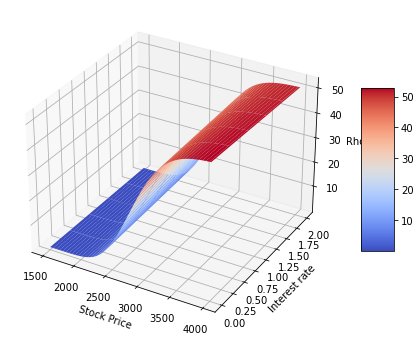

In [83]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, r = np.meshgrid(S, r)
surf = ax.plot_surface(S, r, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Interest rate')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Greeks: Vega

In [74]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [76]:
ve = vega(2972.48, 2800, 0.019, 1.62, 0, 0.99, 'call')
print('The value of Vega for call option is', ve.round(4))

The value of Vega for call option is 125.056


In [77]:
vol = np.linspace(0.1,0.4,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(2972.48, 2800, 0.019, 1.62, 0, vol[i], 'call')

C:\Users\Samson\AppData\Local\Temp/ipykernel_18784/3368267406.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


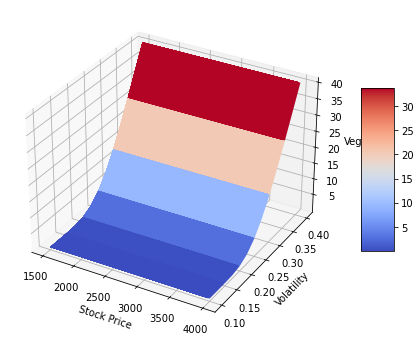

In [78]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, vol = np.meshgrid(S, vol)
surf = ax.plot_surface(S, vol, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Volatility')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);